# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression analysis on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Perform a full linear regression with iterations based on p-value of features and other parameters
* Create visualizations to better understand the distributions of variables in a dataset
* Determine whether or not the assumptions for linear regression hold true for this example

## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
# Import the dataset 'Lego_dataset_cleaned.csv'
df = pd.read_csv('Lego_dataset_cleaned.csv')
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [3]:
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

In [4]:
df.columns = [col_formatting(col) for col in df.columns]
list(df.columns)

['piece_count',
 'list_price',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10plus',
 'ages_10_14',
 'ages_10_16',
 'ages_10_21',
 'ages_11_16',
 'ages_12plus',
 'ages_12_16',
 'ages_14plus',
 'ages_16plus',
 'ages_1half_3',
 'ages_1half_5',
 'ages_2_5',
 'ages_4plus',
 'ages_4_7',
 'ages_4_99',
 'ages_5plus',
 'ages_5_12',
 'ages_5_8',
 'ages_6plus',
 'ages_6_12',
 'ages_6_14',
 'ages_7plus',
 'ages_7_12',
 'ages_7_14',
 'ages_8plus',
 'ages_8_12',
 'ages_8_14',
 'ages_9plus',
 'ages_9_12',
 'ages_9_14',
 'ages_9_16',
 'theme_name_Angry_Birds',
 'theme_name_Architecture',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_3_in_1',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DC_Super_Hero_Girls',
 'theme_name_DIMENSIONS',
 'theme_name_DUPLO',
 'theme_name_Dilophosaurus_Out

In [5]:
outcome = 'list_price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [6]:
# Your code here - Split into train and test
train, test = train_test_split(df)

In [7]:
print(len(train), len(test))
display('Train', train.head(), 'Test', test.head())

8152 2718


'Train'

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
6896,2.646823,363.9860,3.539312,-0.306741,0.368848,0.117830,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2593,-0.337985,19.4922,-0.426440,1.087407,0.990651,1.244458,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7262,-0.605066,42.6878,-0.370585,1.087407,0.990651,-1.491638,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8165,-0.183993,42.6878,-0.398512,1.087407,0.990651,1.244458,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1500,-0.410169,18.2878,-0.426440,1.087407,-1.082024,-3.583946,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


'Test'

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
9079,-0.493181,30.4878,-0.370585,0.564601,0.368848,0.761617,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5227,-0.258583,67.0878,-0.426440,-2.397964,-1.082024,-1.974478,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7156,-0.578598,18.2878,-0.314729,1.087407,0.990651,0.922564,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1865,0.998622,121.9878,8.957311,-0.132473,0.368848,0.439724,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8908,-0.141885,48.7878,-0.063378,-0.481010,-0.252954,-1.008797,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [8]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     571.3
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:50:44   Log-Likelihood:                -40520.
No. Observations:                8152   AIC:                         8.123e+04
Df Residuals:                    8057   BIC:                         8.190e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.6158      1.888     33.687      0.000      59.914      67.318
piece_count                                         77.6534      0.863     89.940      0.000      75.961      79.346
num_reviews                                          6.6203      0.680      9.739      0.000       5.288       7.953
play_star_rating                                     5.1601      0.635      8.128      0.000       3.916       6.405
star_rating                                         -1.3204      0.711     -1.856      0.063      -2.715       0.074
val_star_rating                                     -8.4271      0.638    -13.216      0.000      -9.677      -7.177
ages_10plus                                        122.7013      6.786     18.082      0.000     109.399     136.003
ages_10_14                                         -20.8507      9.224     -2.261      0.024     -38.932      -2.770
ages_10_16                                         -12.4710      4.178     -2.985      0.003     -20.661      -4.281
ages_10_21                                          48.8237      7.566      6.453      0.000      33.993      63.654
ages_11_16                                         -15.6411      5.979     -2.616      0.009     -27.361      -3.922
ages_12plus                                         68.5583      5.818     11.785      0.000      57.154      79.962
ages_12_16                                         -60.2949      6.612     -9.118      0.000     -73.257     -47.333
ages_14plus                                         23.1616      4.126      5.614      0.000      15.074      31.249
ages_16plus                                         24.0597      5.976      4.026      0.000      12.345      35.774
ages_1half_3                                        -8.8729      2.425     -3.658      0.000     -13.627      -4.119
ages_1half_5                                        -4.0263      2.963     -1.359      0.174      -9.834       1.781
ages_2_5                                            15.4543      1.700      9.091      0.000      12.122      18.787
ages_4plus                                         -18.5039      6.685     -2.768      0.006     -31.608      -5.399
ages_4_7                                            -6.2154      3.191     -1.948      0.051     -12.471       0.040
ages_4_99                                           -3.0734      3.796     -0.810      0.418     -10.515       4.368
ages_5plus                                          -9.4813      3.160     -3.000      0.003     -15.676      -3.287
ages_5_12                                          -33.5402      3.282    -10.219      0.000     -39.974     -27.106
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [9]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

103 71
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating', 'ages_10plus']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,63.6158,1.888,33.687,0.000,59.914,67.318
piece_count,77.6534,0.863,89.940,0.000,75.961,79.346
num_reviews,6.6203,0.680,9.739,0.000,5.288,7.953
play_star_rating,5.1601,0.635,8.128,0.000,3.916,6.405
star_rating,-1.3204,0.711,-1.856,0.063,-2.715,0.074


In [10]:
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     766.9
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:50:45   Log-Likelihood:                -40532.
No. Observations:                8152   AIC:                         8.121e+04
Df Residuals:                    8081   BIC:                         8.170e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.6470      1.633     39.595      0.000      61.447      67.848
piece_count                                         77.9060      0.844     92.316      0.000      76.252      79.560
num_reviews                                          6.6431      0.668      9.939      0.000       5.333       7.953
play_star_rating                                     4.6141      0.530      8.705      0.000       3.575       5.653
val_star_rating                                     -8.9531      0.499    -17.935      0.000      -9.932      -7.975
ages_10plus                                        115.4292      4.789     24.105      0.000     106.042     124.816
ages_10_14                                         -16.9675      9.531     -1.780      0.075     -35.651       1.716
ages_10_16                                          -9.6308      3.895     -2.473      0.013     -17.266      -1.995
ages_10_21                                          38.7528      3.267     11.861      0.000      32.348      45.158
ages_11_16                                         -12.9401      5.750     -2.250      0.024     -24.212      -1.668
ages_12plus                                         67.5420      6.243     10.819      0.000      55.304      79.780
ages_12_16                                         -57.5299      6.892     -8.347      0.000     -71.040     -44.019
ages_14plus                                         25.7676      4.663      5.526      0.000      16.627      34.909
ages_16plus                                         25.2713      6.632      3.811      0.000      12.271      38.272
ages_1half_3                                        -2.3240      3.149     -0.738      0.461      -8.497       3.849
ages_2_5                                            21.2675      1.997     10.649      0.000      17.353      25.182
ages_4plus                                         -16.9877     10.189     -1.667      0.096     -36.961       2.986
ages_5plus                                          -8.2707      3.095     -2.672      0.008     -14.338      -2.204
ages_5_12                                          -28.0016      2.703    -10.358      0.000     -33.301     -22.702
ages_6plus                                         -21.6905      5.598     -3.874      0.000     -32.665     -10.716
ages_6_12                                          -15.6584      1.884     -8.311      0.000     -19.352     -11.965
ages_7_12                                          -15.0024      2.198     -6.826      0.000     -19.311     -10.694
ages_7_14                                          -11.2323      1.984     -5.660      0.000     -15.122      -7.342
ages_8plus                               

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [11]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

72 63
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating', 'ages_10plus']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,64.6470,1.633,39.595,0.0,61.447,67.848
piece_count,77.9060,0.844,92.316,0.0,76.252,79.560
num_reviews,6.6431,0.668,9.939,0.0,5.333,7.953
play_star_rating,4.6141,0.530,8.705,0.0,3.575,5.653
val_star_rating,-8.9531,0.499,-17.935,0.0,-9.932,-7.975


In [12]:
p_table

,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,64.6470,1.633,39.595,0.000,61.447,67.848
piece_count,77.9060,0.844,92.316,0.000,76.252,79.560
num_reviews,6.6431,0.668,9.939,0.000,5.333,7.953
play_star_rating,4.6141,0.530,8.705,0.000,3.575,5.653
val_star_rating,-8.9531,0.499,-17.935,0.000,-9.932,-7.975
ages_10plus,115.4292,4.789,24.105,0.000,106.042,124.816
ages_10_14,-16.9675,9.531,-1.780,0.075,-35.651,1.716
ages_10_16,-9.6308,3.895,-2.473,0.013,-17.266,-1.995
ages_10_21,38.7528,3.267,11.861,0.000,32.348,45.158


## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [13]:
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

C:\Users\Desmond\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('piece_count', 4.497388373561417),
 ('num_reviews', 2.574251202197268),
 ('play_star_rating', 1.7845287289886955),
 ('val_star_rating', 1.6012464377546627),
 ('ages_10plus', 7.1444046233217335),
 ('ages_10_16', 1.1644286152787007),
 ('ages_10_21', 1.0572670584036554),
 ('ages_11_16', 1.161759781684351),
 ('ages_12plus', 6.255208502041358),
 ('ages_12_16', 1.1709304132785252),
 ('ages_14plus', 2.165617379724801),
 ('ages_16plus', 9.42091105547748),
 ('ages_2_5', 1.2050928095156717),
 ('ages_5plus', inf),
 ('ages_5_12', 3.179647760462097),
 ('ages_6plus', 2.661955329732192),
 ('ages_6_12', 1.8518405189372082),
 ('ages_7_12', 1.4752360224045067),
 ('ages_7_14', 1.7627200398408773),
 ('ages_8plus', 2.5822609922746365),
 ('ages_8_12', 1.2790479285778937),
 ('ages_8_14', 1.8454834526664283),
 ('ages_9plus', 1.4044088751497856),
 ('ages_9_12', 1.0200540816778811),
 ('ages_9_14', 1.8431530126829025),
 ('theme_name_Architecture', 5.2132280877783685),
 ('theme_name_BOOST', 1.0596110957101803),

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [16]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

63 56


In [17]:
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     868.9
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:52:13   Log-Likelihood:                -40884.
No. Observations:                8152   AIC:                         8.188e+04
Df Residuals:                    8095   BIC:                         8.228e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           66.5104      1.138     58.470      0.000      64.281      68.740
piece_count                                         79.1654      0.659    120.120      0.000      77.874      80.457
num_reviews                                          5.0243      0.616      8.163      0.000       3.818       6.231
play_star_rating                                     5.7220      0.495     11.561      0.000       4.752       6.692
val_star_rating                                    -10.7084      0.495    -21.643      0.000     -11.678      -9.738
ages_10_16                                         -13.7594      3.729     -3.690      0.000     -21.069      -6.450
ages_10_21                                          37.3250      3.288     11.353      0.000      30.881      43.769
ages_11_16                                         -21.3278      5.586     -3.818      0.000     -32.278     -10.377
ages_12_16                                         -63.9021      6.579     -9.712      0.000     -76.800     -51.005
ages_14plus                                         11.2726      3.799      2.967      0.003       3.826      18.719
ages_2_5                                            20.2720      1.854     10.932      0.000      16.637      23.907
ages_5_12                                          -29.0918      2.646    -10.996      0.000     -34.278     -23.906
ages_6plus                                         -23.5596      5.738     -4.106      0.000     -34.807     -12.312
ages_6_12                                          -18.1900      1.634    -11.130      0.000     -21.394     -14.986
ages_7_12                                          -17.1788      2.038     -8.430      0.000     -21.173     -13.184
ages_7_14                                          -12.8400      1.740     -7.379      0.000     -16.251      -9.429
ages_8plus                                           2.8357      4.565      0.621      0.534      -6.112      11.784
ages_8_12                                          -17.8876      2.611     -6.850      0.000     -23.006     -12.769
ages_8_14                                          -14.1728      1.823     -7.775      0.000     -17.746     -10.600
ages_9plus                                          17.2351      9.539      1.807      0.071      -1.464      35.934
ages_9_12                                          -28.6960      6.139     -4.675      0.000     -40.730     -16.662
ages_9_14                                          -11.8843      2.553     -4.656      0.000     -16.888      -6.880
theme_name_BOOST                                    89.5508     11.264      7.950      0.000      67.470     111.632
theme_name_Blues_Helicopter_Pursuit      

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

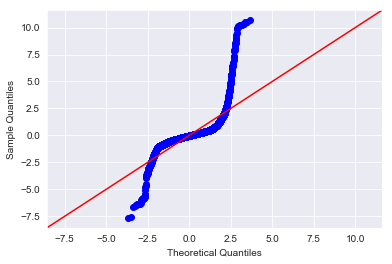

In [19]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

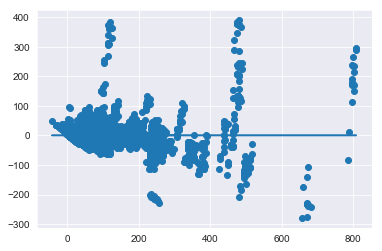

In [20]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the `list_price` increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least two additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

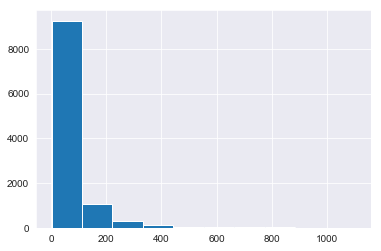

In [22]:
df.list_price.hist()

In [23]:
orig_tot = len(df)
df = df[df.list_price < 450] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)
df.list_price = df.list_price.map(np.log) # Applying a log transformation
train, test = train_test_split(df)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

Percent removed: 0.010487580496780129


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     459.3
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:17:23   Log-Likelihood:                -4785.8
No. Observations:                8067   AIC:                             9686.
Df Residuals:                    8010   BIC:                         1.008e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.3373      0.014    240.427      0.000       3.310       3.365
piece_count                                          0.5864      0.010     59.599      0.000       0.567       0.606
num_reviews                                          0.0051      0.008      0.672      0.502      -0.010       0.020
play_star_rating                                     0.0969      0.006     16.236      0.000       0.085       0.109
val_star_rating                                     -0.1539      0.006    -25.751      0.000      -0.166      -0.142
ages_10_16                                           0.7093      0.045     15.726      0.000       0.621       0.798
ages_10_21                                           0.7030      0.039     17.976      0.000       0.626       0.780
ages_11_16                                           0.3834      0.069      5.532      0.000       0.248       0.519
ages_12_16                                           0.1187      0.087      1.363      0.173      -0.052       0.289
ages_14plus                                          0.4932      0.053      9.228      0.000       0.388       0.598
ages_2_5                                             0.5301      0.022     24.127      0.000       0.487       0.573
ages_5_12                                           -0.6508      0.032    -20.389      0.000      -0.713      -0.588
ages_6plus                                          -0.8395      0.069    -12.196      0.000      -0.974      -0.705
ages_6_12                                           -0.0604      0.020     -3.077      0.002      -0.099      -0.022
ages_7_12                                            0.2088      0.025      8.472      0.000       0.161       0.257
ages_7_14                                            0.1027      0.021      4.867      0.000       0.061       0.144
ages_8plus                                           0.6183      0.056     11.005      0.000       0.508       0.728
ages_8_12                                            0.3553      0.032     11.102      0.000       0.293       0.418
ages_8_14                                            0.4510      0.022     20.629      0.000       0.408       0.494
ages_9plus                                           0.1958      0.126      1.559      0.119      -0.050       0.442
ages_9_12                                            0.4598      0.079      5.798      0.000       0.304       0.615
ages_9_14                                            0.6128      0.031     19.849      0.000       0.552       0.673
theme_name_BOOST                                     1.0099      0.121      8.365      0.000       0.773       1.247
theme_name_Blues_Helicopter_Pursuit      

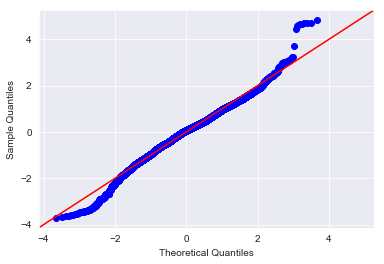

In [24]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

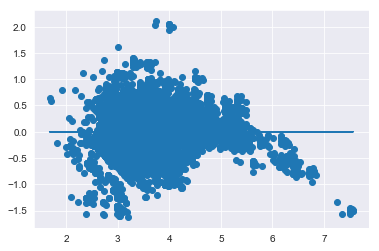

In [26]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))]);

0.8 percentile: 4.447203233446613
0.81 percentile: 4.512971560274537
0.82 percentile: 4.542526402035123
0.83 percentile: 4.580752485605895
0.84 percentile: 4.640913706863106
0.85 percentile: 4.6985494117910225
0.86 percentile: 4.718373863481943
0.87 percentile: 4.787408405976297
0.88 percentile: 4.8039210397329235
0.89 percentile: 4.826327766567244
0.9 percentile: 4.89924031131419
0.91 percentile: 4.976713742220571
0.92 percentile: 5.0490223265009595
0.93 percentile: 5.140421850231899
0.94 percentile: 5.209419483952433
0.95 percentile: 5.292263579298989
0.96 percentile: 5.391752152536553
0.97 percentile: 5.528952783620542
0.98 percentile: 5.678340376637527
0.99 percentile: 5.873347331375852


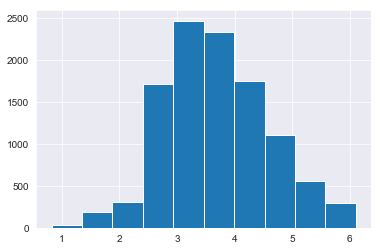

In [27]:

for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

df.list_price.hist()

In [28]:
df = df[df.list_price <= 6]
train, test = train_test_split(df)

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     452.9
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:40:00   Log-Likelihood:                -4696.0
No. Observations:                8027   AIC:                             9506.
Df Residuals:                    7970   BIC:                             9904.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.3390      0.014    235.605      0.000       3.311       3.367
piece_count                                          0.6758      0.011     60.960      0.000       0.654       0.698
num_reviews                                         -0.0249      0.008     -3.263      0.001      -0.040      -0.010
play_star_rating                                     0.0836      0.006     14.198      0.000       0.072       0.095
val_star_rating                                     -0.1415      0.006    -24.054      0.000      -0.153      -0.130
ages_10_16                                           0.6431      0.044     14.656      0.000       0.557       0.729
ages_10_21                                           0.7493      0.038     19.466      0.000       0.674       0.825
ages_11_16                                           0.2663      0.070      3.820      0.000       0.130       0.403
ages_12_16                                          -0.0693      0.086     -0.803      0.422      -0.239       0.100
ages_14plus                                          0.3990      0.054      7.429      0.000       0.294       0.504
ages_2_5                                             0.5809      0.022     26.915      0.000       0.539       0.623
ages_5_12                                           -0.6219      0.031    -19.929      0.000      -0.683      -0.561
ages_6plus                                          -0.8513      0.068    -12.536      0.000      -0.984      -0.718
ages_6_12                                           -0.0522      0.020     -2.645      0.008      -0.091      -0.014
ages_7_12                                            0.2162      0.025      8.762      0.000       0.168       0.265
ages_7_14                                            0.1151      0.021      5.591      0.000       0.075       0.155
ages_8plus                                           0.6238      0.052     12.021      0.000       0.522       0.725
ages_8_12                                            0.3405      0.031     10.915      0.000       0.279       0.402
ages_8_14                                            0.4515      0.022     20.230      0.000       0.408       0.495
ages_9plus                                           0.1990      0.124      1.604      0.109      -0.044       0.442
ages_9_12                                            0.4398      0.079      5.597      0.000       0.286       0.594
ages_9_14                                            0.5569      0.031     17.813      0.000       0.496       0.618
theme_name_BOOST                                     0.9990      0.120      8.339      0.000       0.764       1.234
theme_name_Blues_Helicopter_Pursuit      

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches, and make ongoing refinements. These choices depend on the context and specific use cases. 